In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
x = iris.data
y = iris.target

In [4]:
indices = np.random.choice(len(x), 200)
x = x[indices]
y = y[indices]

y

array([2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0,
       0, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0,
       2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 1,
       1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1,
       2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1,
       0, 2])

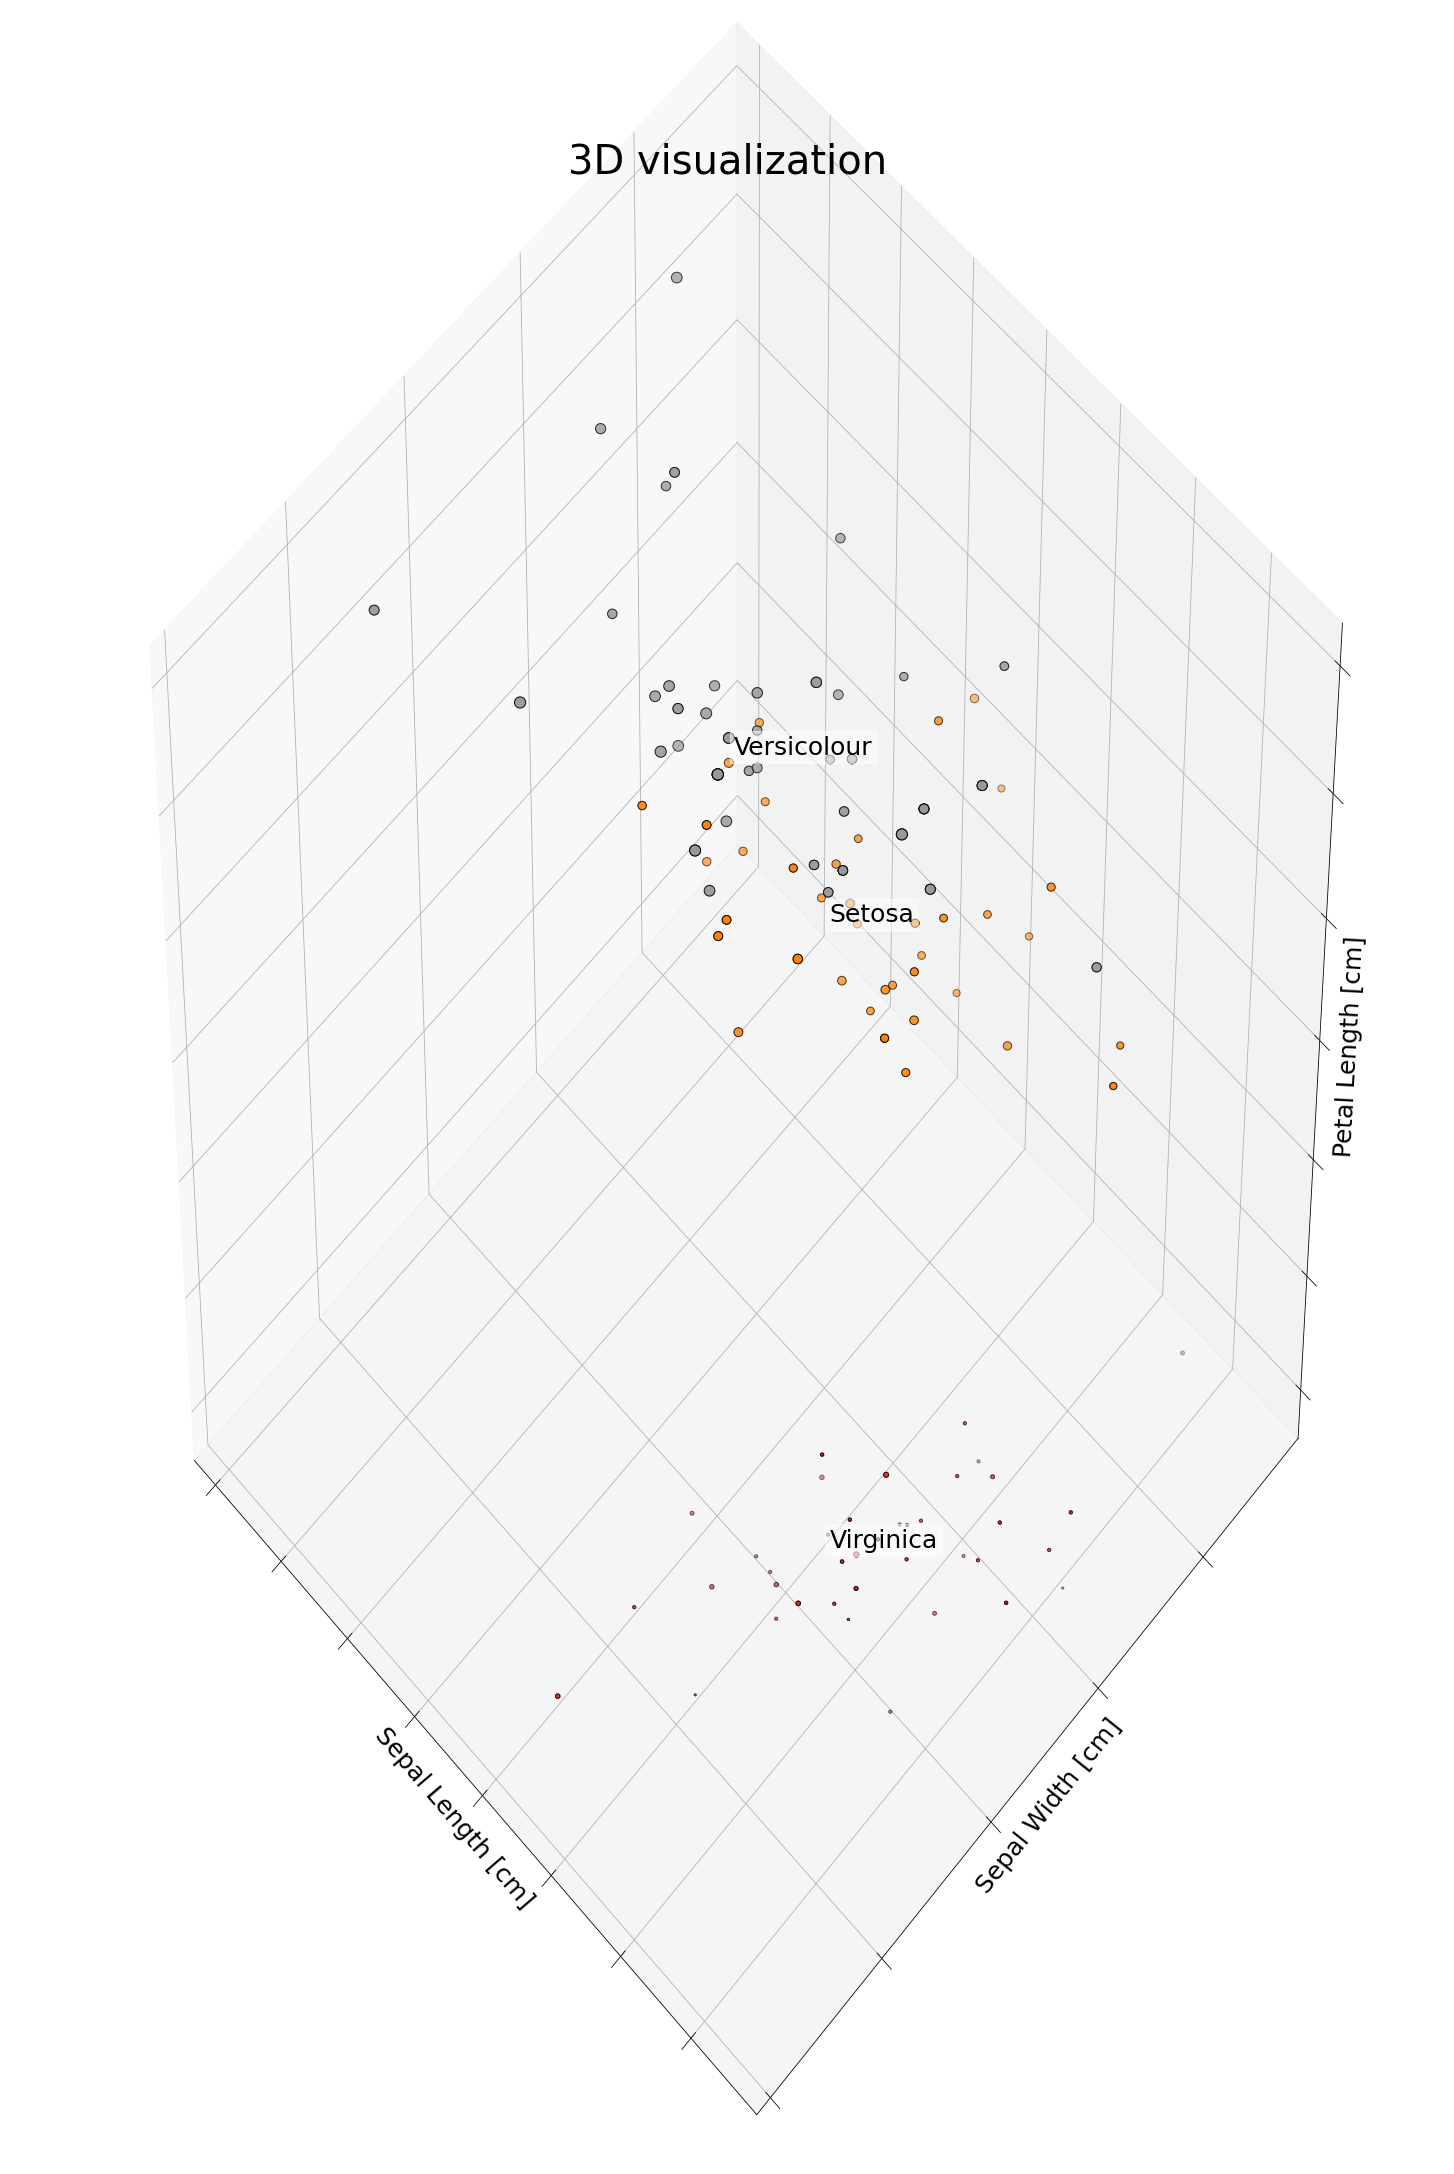

In [5]:
from mpl_toolkits.mplot3d import Axes3D

plot = plt.figure(1, figsize=(20, 30))
ax = Axes3D(plot, elev=48, azim=134)
ax.scatter(x[:, 0]
           , x[:, 1]
           , x[:, 2]
           , c=y
           , cmap=plt.cm.Set1
           , edgecolor='k'
           , s=x[:, 3] * 50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(x[y == label, 0].mean(),
              x[y == label, 1].mean(),
              x[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred) * 100

print(f'Accuracy score: {accuracy}%')

Accuracy score: 95.0%


In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=10)
mlp.fit(x_train, y_train)

C:\Users\Bill\anaconda3\envs\DeepLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=10)

In [8]:
y_pred_mlp = mlp.predict(x_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy score: {accuracy}%')

Accuracy score: 95.0%


In [11]:
cm

array([[14,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 13]], dtype=int64)

In [12]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

svmclassifier = svm.SVC(kernel='linear', C=0.01)
svmclassifier.fit(x_train, y_train)

SVC(C=0.01, kernel='linear')

In [13]:
y_pred_svm = svmclassifier.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy score: {accuracy}%')

Accuracy score: 95.0%


In [14]:
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[14,  0,  0],
       [ 0,  6,  6],
       [ 0,  1, 13]], dtype=int64)